In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'B:\Major_Git\Capstone-99acres\data\external\gurgaon_properties_cleaned_v2.csv')

In [4]:
pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_colwidth',None)

In [5]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sare homes,sector 92,0.60,5000.0,1200.0,Carpet area: 1200 (111.48 sq.m.),3,2,3,4.0,NaN,Moderately Old,NaN,NaN,1200.0,0,0,0,0,0,0,49
1,flat,ireo skyon,sector 60,3.60,12815.0,2809.0,Super Built up area 2809(260.96 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.),4,5,3,24.0,North-East,Relatively New,2809.0,NaN,2400.0,0,1,0,0,0,0,49
2,flat,shapoorji pallonji joyville gurugram,sector 102,0.97,10601.0,915.0,Super Built up area 915(85.01 sq.m.),2,2,2,12.0,East,Relatively New,915.0,NaN,NaN,0,0,0,0,0,1,100
3,house,rattan garden,sector 7,1.30,13499.0,963.0,Built Up area: 963 (89.47 sq.m.),5,3,2,3.0,NaN,Old Property,NaN,963.0,NaN,0,0,0,0,0,1,0
4,flat,signature global park 4,sector 36,0.72,6428.0,1120.0,Carpet area: 1120 (104.05 sq.m.),3,2,3,2.0,NaN,Undefined,NaN,NaN,1120.0,0,0,0,0,0,1,0


In [6]:
df.shape

(3961, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3961 non-null   object 
 1   society              3960 non-null   object 
 2   sector               3961 non-null   object 
 3   price                3941 non-null   float64
 4   price_per_sqft       3941 non-null   float64
 5   area                 3941 non-null   float64
 6   areaWithType         3961 non-null   object 
 7   bedRoom              3961 non-null   int64  
 8   bathroom             3961 non-null   int64  
 9   balcony              3961 non-null   object 
 10  floorNum             3940 non-null   float64
 11  facing               2784 non-null   object 
 12  agePossession        3961 non-null   object 
 13  super_built_up_area  1934 non-null   float64
 14  built_up_area        1848 non-null   float64
 15  carpet_area          2003 non-null   f

In [9]:
df.duplicated().sum()

129

In [10]:
# Removing the duplicated values. This will introduce the biasness in the dataset and overfit the model.
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sare homes,sector 92,0.6,5000.0,1200.0,Carpet area: 1200 (111.48 sq.m.),3,2,3,4.0,NaN,Moderately Old,NaN,NaN,1200.0,0,0,0,0,0,0,49
1,flat,ireo skyon,sector 60,3.6,12815.0,2809.0,Super Built up area 2809(260.96 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.),4,5,3,24.0,North-East,Relatively New,2809.0,NaN,2400.0,0,1,0,0,0,0,49


## Property Type

<Axes: xlabel='property_type'>

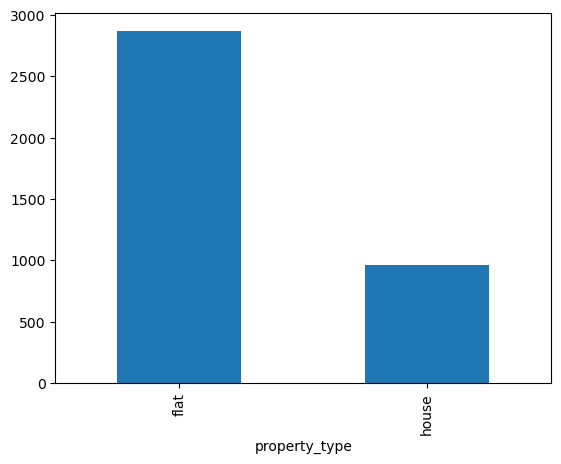

In [ ]:

df['property_type'].value_counts().plot(kind='bar')

In [19]:
df['property_type'].value_counts()
# As we can see we have more numbers of flats as compare to the houses.


property_type
flat     2869
house     963
Name: count, dtype: int64

In [20]:
df['property_type'].isnull().sum()

0

* 75% values are flats as compare to the houses
* 25% values are the houses
* There are no null values

## Society


In [21]:
df['society'].isnull().sum()

1

In [23]:
df['society'].value_counts().shape

(725,)

In [25]:
df['society'].value_counts().head(50)

society
independent                             569
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
signature global park                    35
shree vardhman victoria                  34
emaar mgf emerald floors premier         32
smart world orchard                      32
dlf the ultima                           31
paras dews                               31
dlf regal gardens                        30
m3m woodshire                            30
shree vardhman flora                     29
la vida by tata housing                  28
smart world gems                         28
signature global solera                  27
godrej nature plus                       27
bptp terra                               25
tata primanti                            24
emaar gurgaon greens                     24
experion the heartsong                   24
vatika gurgaon          

In [33]:
df[df['society'] !='independent']['society'].value_counts(normalize=True).cumsum().head(77)

society
tulip violet                            0.022992
ss the leaf                             0.045371
shapoorji pallonji joyville gurugram    0.058246
dlf new town heights                    0.071122
signature global park                   0.081852
shree vardhman victoria                 0.092275
smart world orchard                     0.102085
emaar mgf emerald floors premier        0.111895
dlf the ultima                          0.121398
paras dews                              0.130901
m3m woodshire                           0.140098
dlf regal gardens                       0.149295
shree vardhman flora                    0.158185
la vida by tata housing                 0.166769
smart world gems                        0.175353
signature global solera                 0.183630
godrej nature plus                      0.191907
bptp terra                              0.199571
tata primanti                           0.206928
vatika gurgaon                          0.214286
experion the

In [37]:
society_counts=df['society'].value_counts()

freq_bins={
    'Very high(>100)':(society_counts>100).sum(),
    'High (50-100)':((society_counts>=50)& (society_counts<=100)).sum(),
    'Average(10-49)':((society_counts<=49) & (society_counts>=10)).sum(),
    'Low(2-9)'     :((society_counts<=9) & (society_counts>=2)).sum(),
    'Very Low(1)'  :(society_counts==1).sum()
}
freq_bins

{'Very high(>100)': 1,
 'High (50-100)': 2,
 'Average(10-49)': 92,
 'Low(2-9)': 287,
 'Very Low(1)': 343}

<Axes: xlabel='society'>

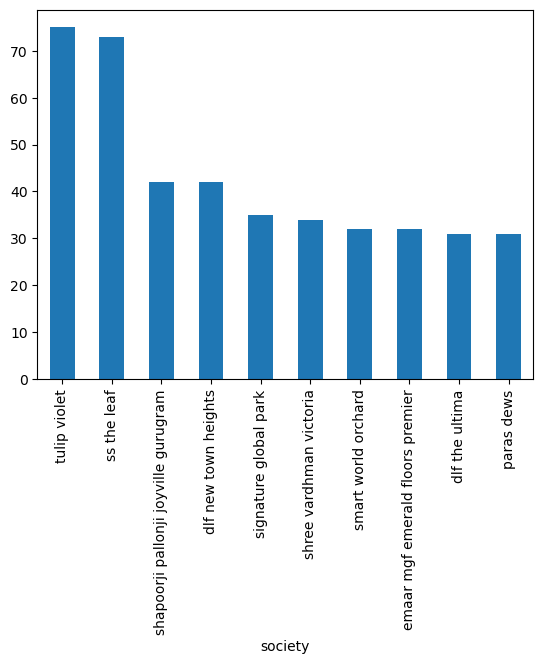

In [48]:
df[df['society'] !='independent']['society'].value_counts(ascending=False).head(10).plot(kind='bar')

<Axes: ylabel='count'>

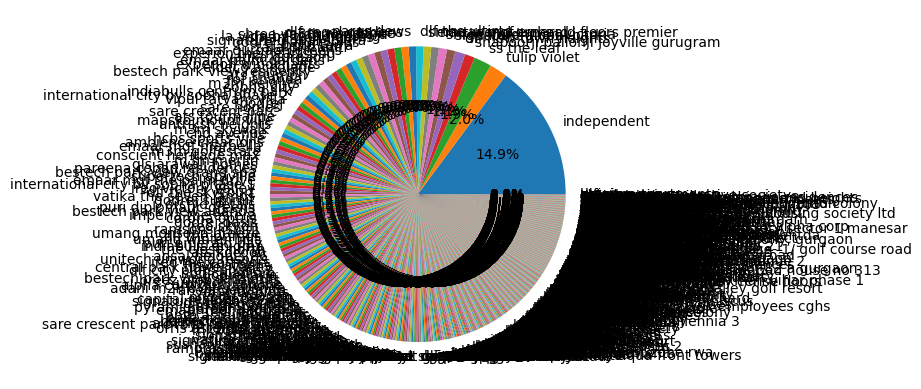

In [47]:
df['society'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## Observations for Society
* There is only 1 missing value
* Top 77 Socities own the 50% of the flats and rest 50% comes under 648 Societies
* Tulip Violet is the only Society who has more than 100 flats
   * 'Very high(>100)': 1 societies have more than 100 flats,
   * 'High (50-100)': 2 Societies have more than 50-100 flats  ,
   * 'Average(10-49)': 92 societies fall in this range with 10 to 49 listings each.,
   * 'Low(2-9)': 287 societies have between 2 to 9 listings,
   * 'Very Low(1)': 343 societies, have only 1 listing
*  14.9 % flats are Independent flats



## Sector

In [66]:
df['sector'].value_counts().shape

(234,)

<Axes: xlabel='sector'>

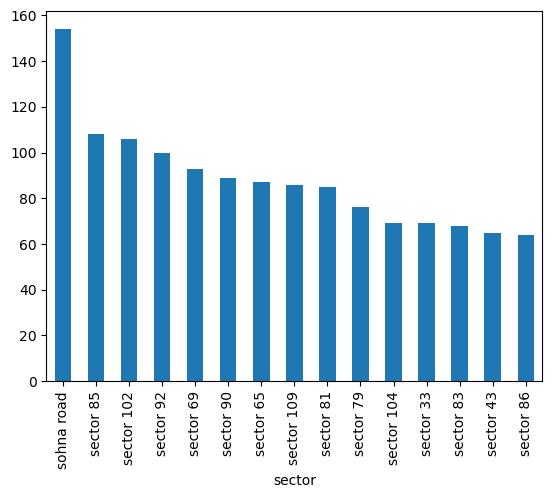

In [51]:
df['sector'].value_counts(ascending=False).head(15).plot(kind='bar')

In [52]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 59,
 'Very Low (1)': 84}

In [62]:
Cumsum_of_sector=(df['sector'].value_counts(normalize=True,ascending=False).head(26).cumsum())*100
print(Cumsum_of_sector)

sector
sohna road     4.018789
sector 85      6.837161
sector 102     9.603340
sector 92     12.212944
sector 69     14.639875
sector 90     16.962422
sector 65     19.232777
sector 109    21.477035
sector 81     23.695198
sector 79     25.678497
sector 104    27.479123
sector 33     29.279749
sector 83     31.054280
sector 43     32.750522
sector 86     34.420668
sector 50     36.090814
sector 37d    37.734864
sector 95     39.352818
sector 2      40.970772
sector 107    42.536534
sector 108    44.076200
sector 89     45.563674
sector 56     47.025052
sector 48     48.460334
sector 70a    49.869520
sector 37c    51.200418
Name: proportion, dtype: float64


In [68]:
df['sector'].value_counts().sum()

3832

## Observations for Sector
* Thera are total 234 total unique sector 
  * 'Very High (>100)': 3,
  *  'High (50-100)': 25,
  *  'Average (10-49)': 63,
  *  'Low (2-9)': 59,
   * 'Very Low (1)': 84

* Top 26 sector own the 50% percent of flat

## Price

In [69]:
df['price'].isnull().sum()

19

In [70]:
df['price'].describe()

count    3813.000000
mean        2.502258
std         2.952371
min         0.070000
25%         0.920000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

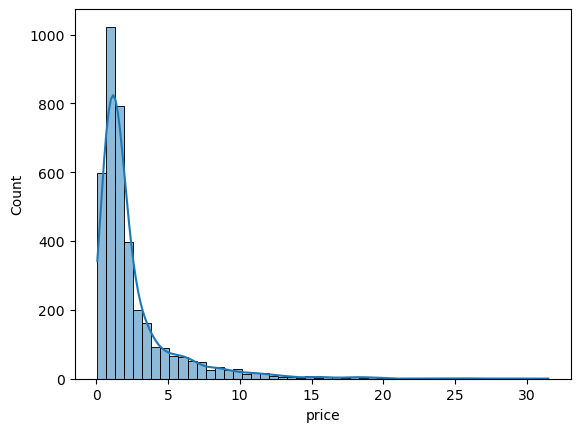

In [71]:
sns.histplot(df['price'],kde=True,bins=50)

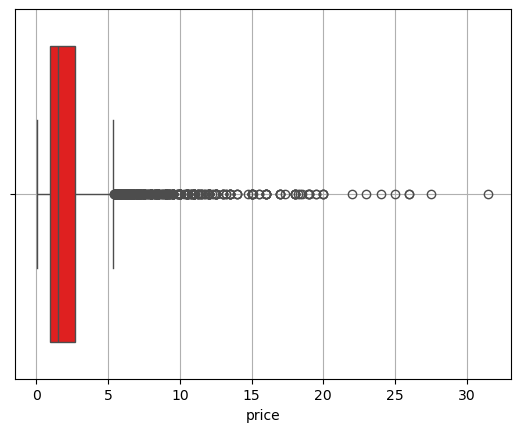

In [73]:
sns.boxplot(x=df['price'],color='red')
plt.grid()

In [87]:
# Frequency distribution for price
sector_count = df['price'].value_counts()

sector_frequency_bins = {
    "Very High (>50)": (sector_count > 50).sum(),
    "High (25-50)": ((sector_count >= 25) & (sector_count <50)).sum(),
    "Average (25-15)": ((sector_count >= 15) & (sector_count < 25)).sum(),
    "Medium (15-10)": ((sector_count > 10) & (sector_count < 15)).sum(),
    "Low (5-10)": ((sector_count > 5) & (sector_count < 10)).sum(),
    "Moderate Low(1-5)":((sector_count > 1) & (sector_count < 5)).sum(),
    "Very Low <1":(sector_count <1.00).sum()
}

sector_frequency_bins

{'Very High (>50)': 10,
 'High (25-50)': 29,
 'Average (25-15)': 29,
 'Medium (15-10)': 24,
 'Low (5-10)': 77,
 'Moderate Low(1-5)': 120,
 'Very Low <1': 0}

In [84]:
df['price'].value_counts().sum()

3813

In [93]:
skew=df['price'].skew()
kurt=df['price'].kurt()
print(skew,kurt)

3.298505609036264 15.156548067630554


In [94]:
# Quantile Analysis
quantiles=df['price'].quantile([0.01,0.05,0.95,0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.490
0.99    15.088
Name: price, dtype: float64

In [97]:
Q1=df['price'].describe()['25%']
Q3=df['price'].describe()['75%']
IQR=Q3-Q1
IQR

1.7800000000000002

In [99]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000004 5.370000000000001


In [103]:
outliers=df[(df['price']<lower_bound )| (df['price']>upper_bound)]
outliers.shape

(439, 23)

In [107]:
outliers['price'].describe()

count    439.000000
mean       9.164556
std        4.049009
min        5.400000
25%        6.350000
50%        8.000000
75%       10.550000
max       31.500000
Name: price, dtype: float64

<Axes: xlabel='price'>

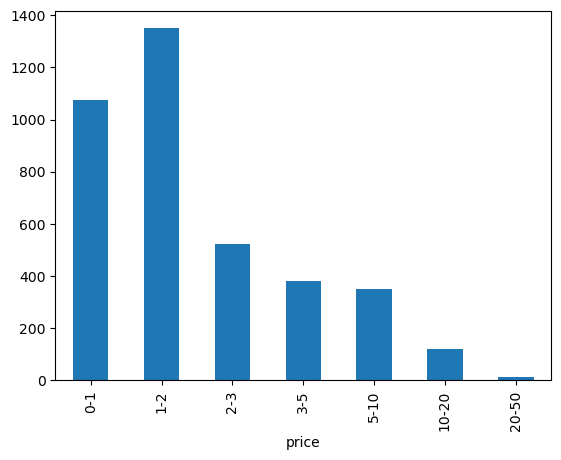

In [108]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

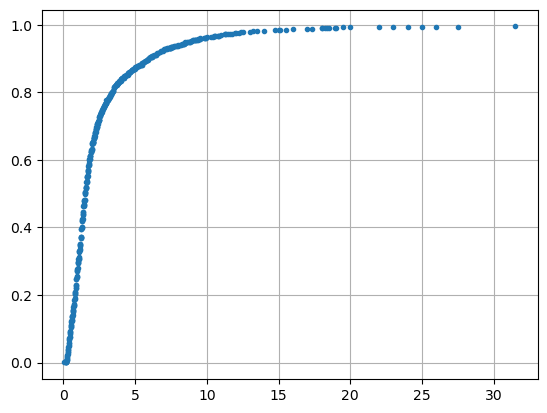

In [110]:
# ecdf plot
ecdf=df['price'].value_counts().sort_index().cumsum()/len(df['price'])
plt.plot(ecdf.index,ecdf,marker='.',linestyle='none')
plt.grid()

Text(0, 0.5, 'Freqency')

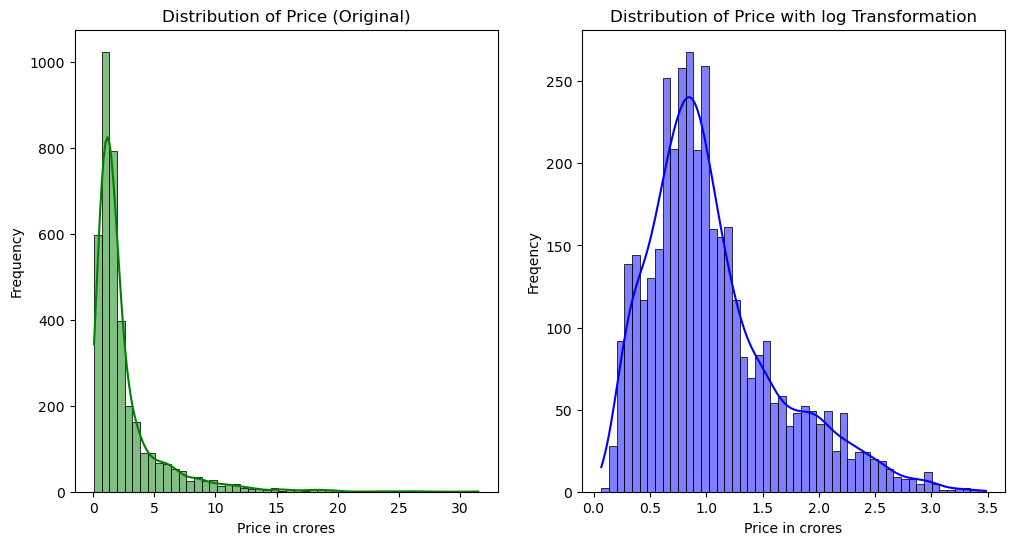

In [113]:
plt.figure(figsize=(12,6))

# Distrubution of Price without log transformation
plt.subplot(1,2,1)
sns.histplot(df['price'],kde=True,bins=50,color='green')
plt.title('Distribution of Price (Original)')
plt.xlabel('Price in crores')
plt.ylabel('Frequency')

#Distribution of Price with log Transformation
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']),kde=True,bins=50,color='blue')
plt.title('Distribution of Price with log Transformation')
plt.xlabel('Price in crores')
plt.ylabel('Freqency')

np.log1p(x) This function is the natural logirathm of 1+x. Is is designed to provide more accurate results for values  of the x that are very close to the zero

Using the np.log1p function helps the transforming the columns even if there are 0 values are present in the the feature which will be handeled carefully  

In [115]:
skew=df['price'].skew()
kurt=df['price'].kurt()

skewL=np.log1p(df['price']).skew()
kurtL=np.log1p(df['price']).kurt()

print(skew,kurt)
print(skewL,kurtL)

3.298505609036264 15.156548067630554
1.0728015644184137 0.9699016095316595


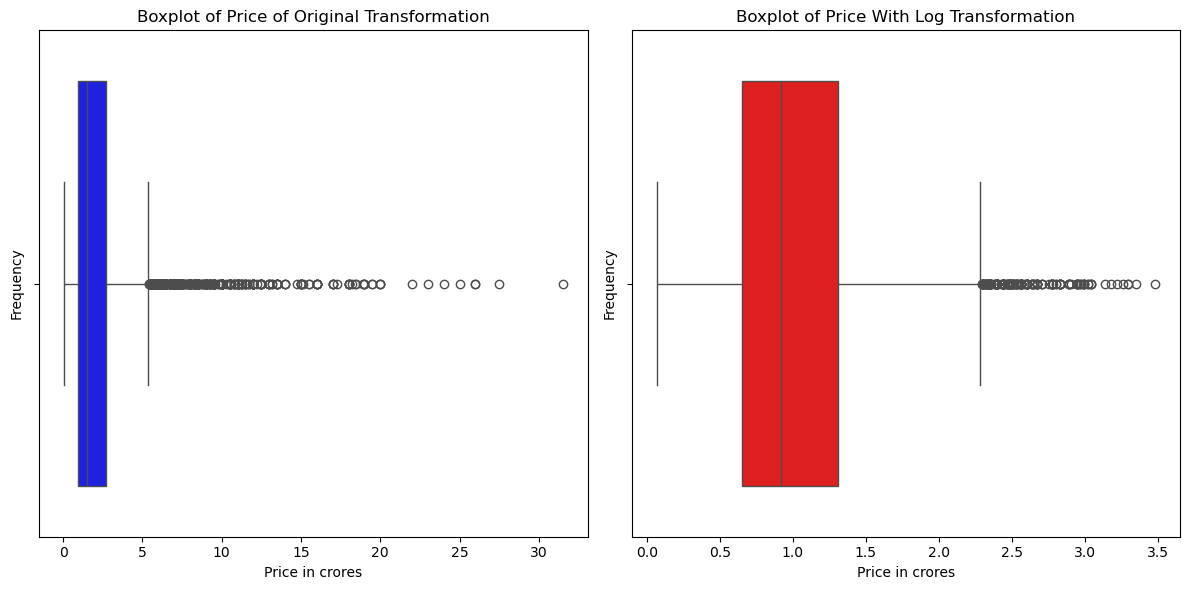

In [119]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
# Display the Boxplot with original Transformation
sns.boxplot(x=df['price'],color='blue')
plt.title('Boxplot of Price of Original Transformation')
plt.xlabel('Price in crores')
plt.ylabel('Frequency')

# Dicplay the Boxplot with log Transformation
plt.subplot(1,2,2)
sns.boxplot(x=np.log1p(df['price']),color='red')
plt.title('Boxplot of Price With Log Transformation')
plt.xlabel('Price in crores')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

## Price per square feet

In [120]:
df['price_per_sqft'].isnull().sum()

19

In [121]:
df['price_per_sqft'].describe()

count      3813.000000
mean      14012.019145
std       23344.201645
min           2.000000
25%        6806.000000
50%        9011.000000
75%       13875.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

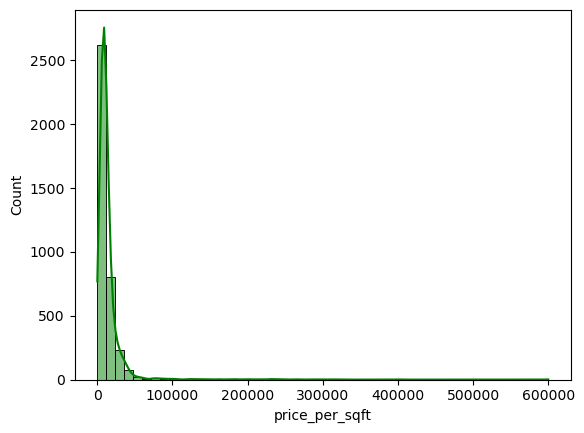

In [127]:
sns.histplot(df['price_per_sqft'],kde=True,bins=50,color='green')

The data is highly right skeweed. The most of the price_per_sqft is range between 0₹ to 40,000₹

<Axes: xlabel='price_per_sqft'>

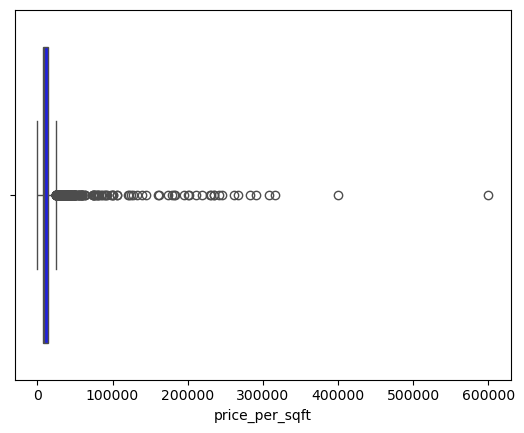

In [129]:
sns.boxplot(x=df['price_per_sqft'],color='blue')

* There are 19 missing values
* The data is right skeweed 
* There are big outliers

## Bedroom

In [130]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

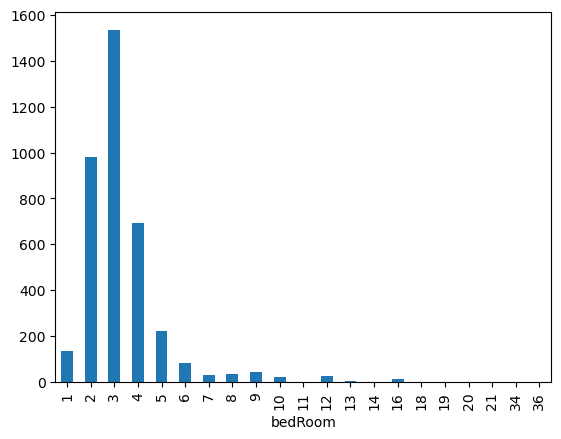

In [131]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

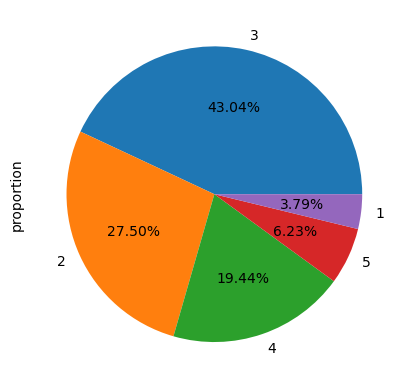

In [132]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# Bathroom

In [133]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

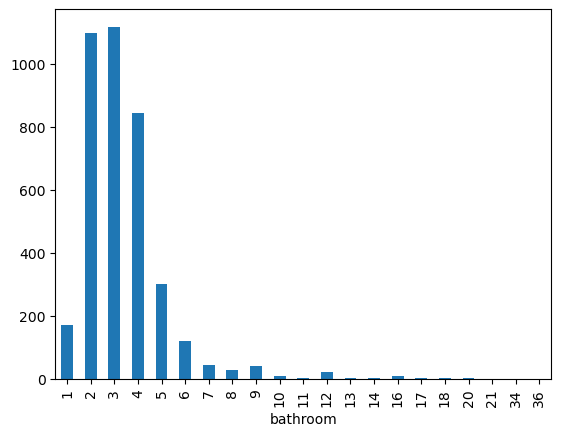

In [134]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

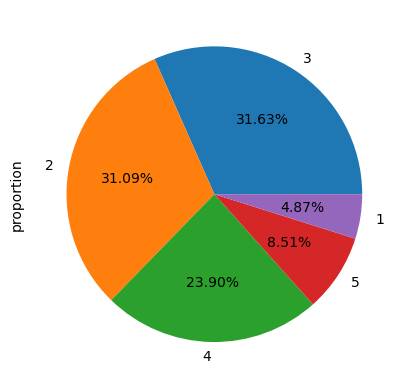

In [138]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct="%0.2f%%")

# Balcony

In [139]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

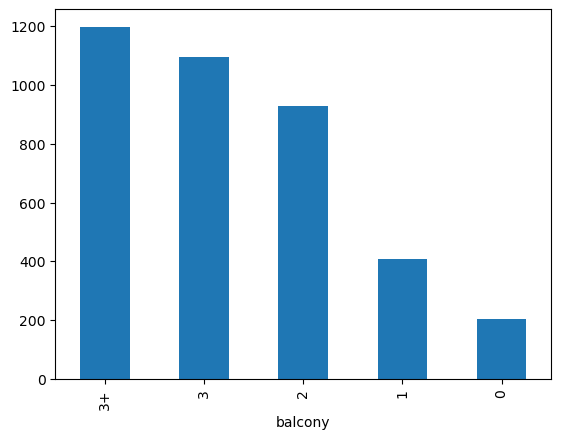

In [140]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

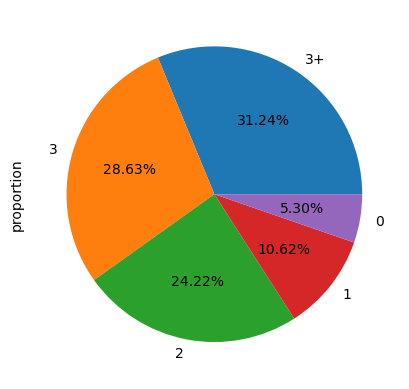

In [141]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct="%0.2f%%")

# Floow Num

In [142]:
df['floorNum'].isnull().sum()

21

In [143]:
df['floorNum'].describe()

count    3811.000000
mean        6.652847
std         5.991852
min         0.000000
25%         2.000000
50%         4.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

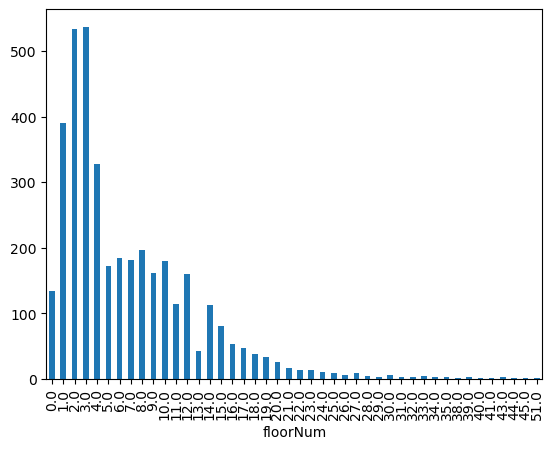

In [144]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

# Facing

In [145]:
df['facing'].isnull().sum()

1115

In [146]:
df['facing'].fillna('NA',inplace=True)

In [147]:
df['facing'].value_counts()

facing
NA            1115
East           649
North-East     646
North          399
West           252
South          235
North-West     199
South-East     182
South-West     155
Name: count, dtype: int64

# Age Possession

In [148]:
df['agePossession'].value_counts()

agePossession
Relatively New        1674
New Property           613
Moderately Old         598
Undefined              473
Old Property           346
Under Construction     128
Name: count, dtype: int64

In [149]:
df['agePossession'].isnull().sum()

0

# Area

In [150]:
df['super_built_up_area'].isnull().sum()

1939

In [152]:
df['super_built_up_area'].describe()

count     1893.000000
mean      1920.915240
std        765.408479
min         89.000000
25%       1465.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

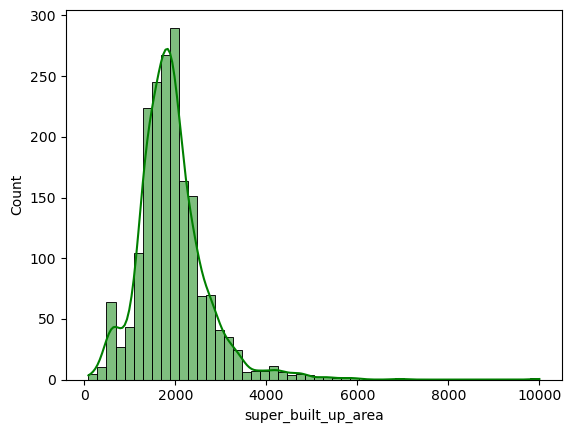

In [154]:
sns.histplot(df['super_built_up_area'].dropna(),bins=50,kde=True,color='green')

<Axes: xlabel='super_built_up_area'>

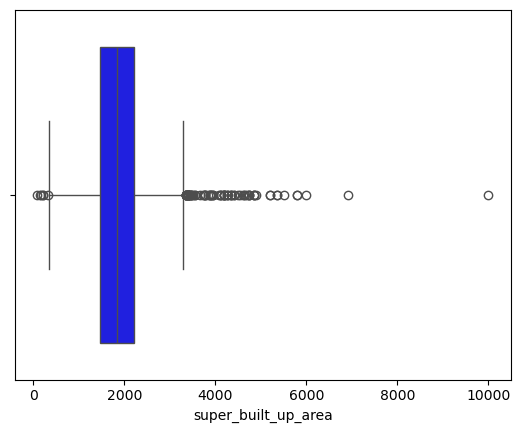

In [157]:
sns.boxplot(x=df['super_built_up_area'].dropna(),color='blue')

* Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
* There are a few properties with a significantly larger area, leading to a right-skewed distribution.
* The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
* There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

# Built up area

In [159]:
df['built_up_area'].isnull().sum()

2028

In [160]:
df['built_up_area'].describe()

count      1804.000000
mean       1798.199905
std       17383.678221
min           2.000000
25%         360.000000
50%        1194.500000
75%        1860.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

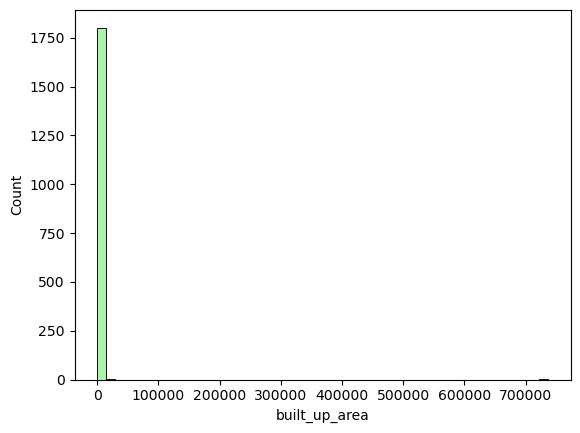

In [163]:
sns.histplot(df['built_up_area'].dropna(),kde=False,bins=50,color='lightgreen')

<Axes: xlabel='built_up_area'>

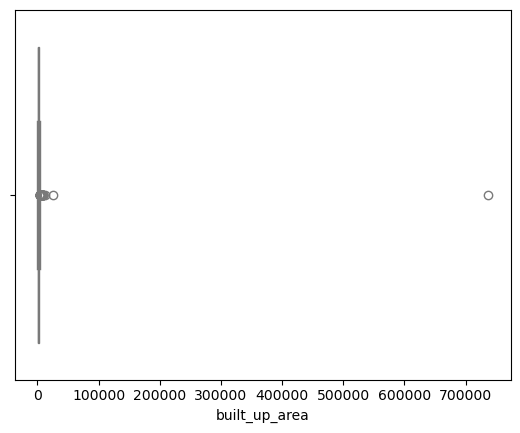

In [165]:
sns.boxplot(x=df['built_up_area'].dropna(),color='lightblue')

# Additional Room

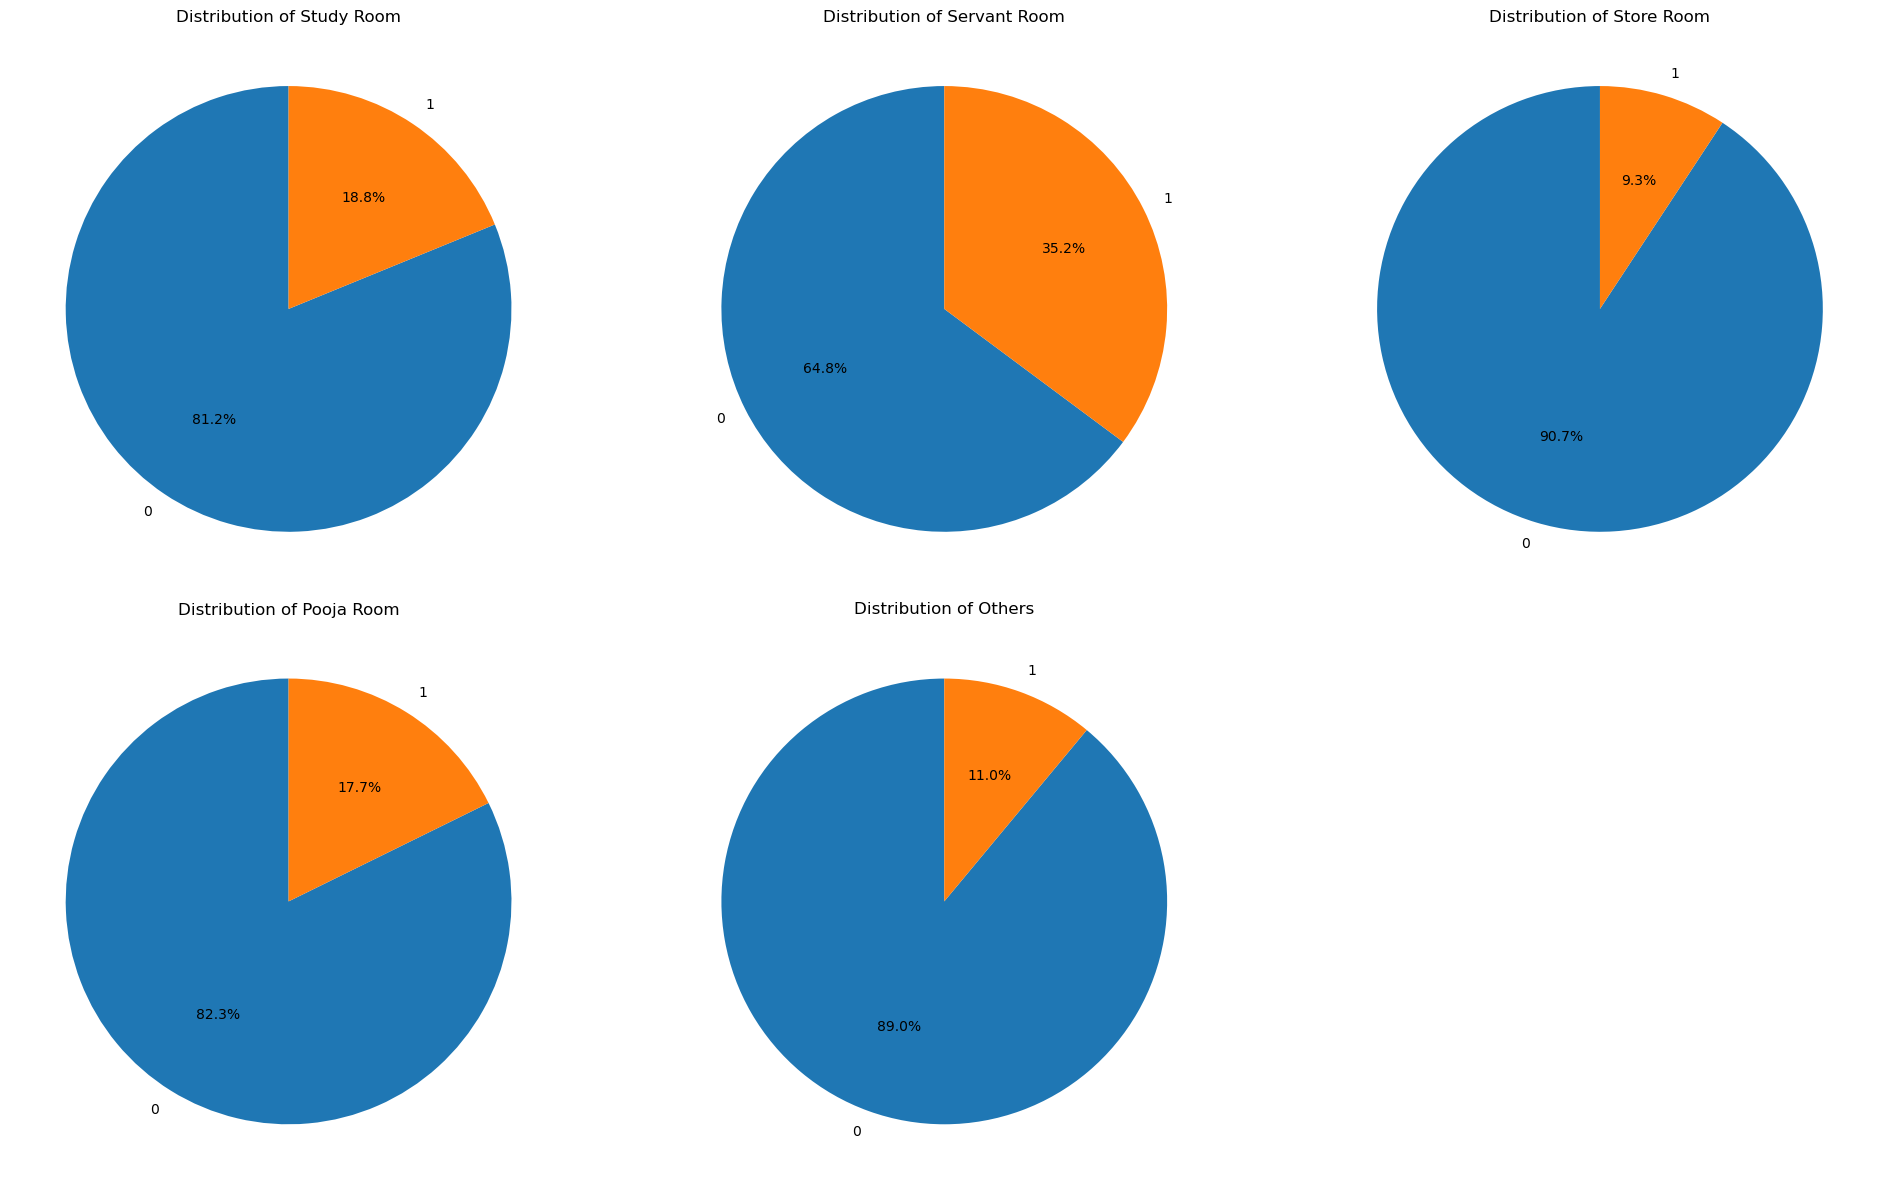

In [166]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Furnishing Type

In [167]:
df['furnishing_type'].value_counts()

furnishing_type
1    2537
0    1083
2     212
Name: count, dtype: int64

<Axes: ylabel='count'>

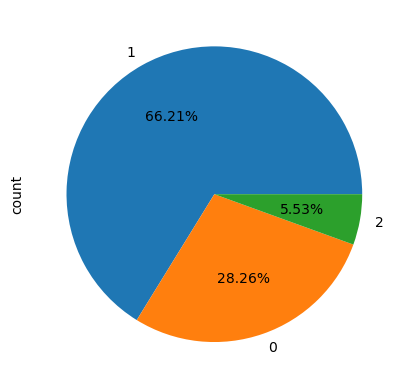

In [168]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# Luxury Room

In [169]:
df['luxury_score'].isnull().sum()

0

In [170]:
df['luxury_score'].describe()

count    3832.000000
mean       69.632046
std        53.287735
min         0.000000
25%        28.000000
50%        56.000000
75%       108.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

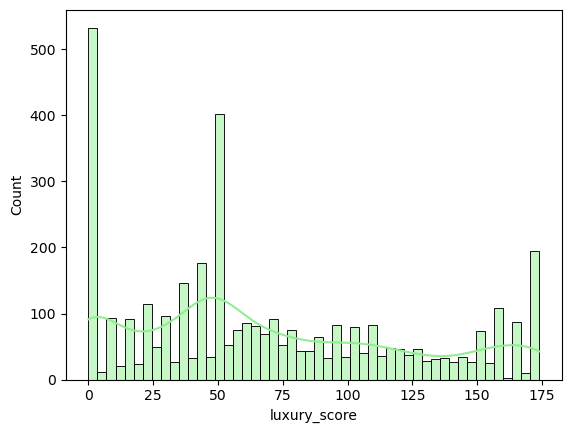

In [172]:
sns.histplot(df['luxury_score'], bins=50, color='lightgreen', kde=True)

<Axes: xlabel='luxury_score'>

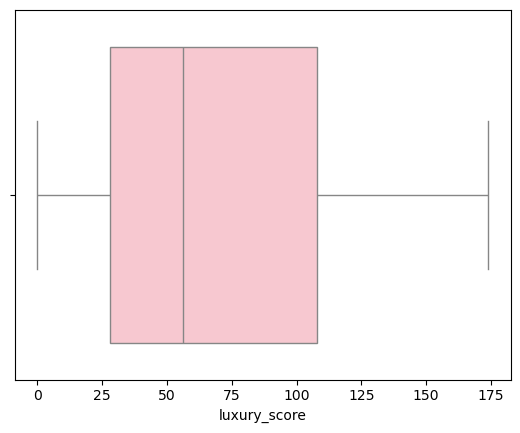

In [174]:
sns.boxplot(x=df['luxury_score'], color='pink')

* The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

* The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.